In [1]:
import os
os.chdir("../../")

In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

In [5]:
df = pd.read_csv('/home/mohsen/data/scArches/brain_different_freeze_versions.csv')
df

,ASW_label/batch,PCR_batch,graph_conn,EBM,NMI_cluster/label,ARI_cluster/label,ASW_label,isolated_label_F1,isolated_label_silhouette,KNN,method,data,rqr,reference_time,query_time
0,0.888429,0.917079,0.952835,0.214079,0.844037,0.901297,0.502487,0.346863,0.461216,0.808705,scArches trVAE,mouse_brain,NaN,4839.32,3174.32
1,0.791236,0.964464,0.873430,0.086727,0.752542,0.721209,0.513877,0.411642,0.513318,0.887295,scArches trVAE,mouse_brain,v2,4839.32,4927.99
2,0.829211,0.123706,0.889214,0.153276,0.795329,0.848604,0.561702,0.683544,0.456282,0.896720,scArches trVAE,mouse_brain,v1,4839.32,4192.77


In [6]:
df['Bio Preservation'] = (df['NMI_cluster/label'] + df['ARI_cluster/label'] + df['ASW_label'] + df['isolated_label_F1'] + df['isolated_label_silhouette'] + df['KNN']) / 6
df['Batch Correction'] = (df['ASW_label/batch'] + df['PCR_batch'] + df['graph_conn'] + df['EBM']) / 4

In [7]:
df

,ASW_label/batch,PCR_batch,graph_conn,EBM,NMI_cluster/label,ARI_cluster/label,ASW_label,isolated_label_F1,isolated_label_silhouette,KNN,method,data,rqr,reference_time,query_time,Bio Preservation,Batch Correction
0,0.888429,0.917079,0.952835,0.214079,0.844037,0.901297,0.502487,0.346863,0.461216,0.808705,scArches trVAE,mouse_brain,NaN,4839.32,3174.32,0.644101,0.743106
1,0.791236,0.964464,0.873430,0.086727,0.752542,0.721209,0.513877,0.411642,0.513318,0.887295,scArches trVAE,mouse_brain,v2,4839.32,4927.99,0.633314,0.678964
2,0.829211,0.123706,0.889214,0.153276,0.795329,0.848604,0.561702,0.683544,0.456282,0.896720,scArches trVAE,mouse_brain,v1,4839.32,4192.77,0.707030,0.498852


In [8]:
df = df[['method', 'Bio Preservation', 'Batch Correction']]

In [10]:
df['log_n_params'] = [np.log(640), np.log(535780), np.log(256960)]
df['method'] = ['scArches trVAE', 'scArches trVAE v2', 'scArches trVAE v1']
df['0.6*Bio+0.4*Batch'] = 0.6 * df['Bio Preservation'] + 0.4 * df['Batch Correction']

/home/mohsen/.env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/mohsen/.env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/mohsen/.env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [12]:
df = df.iloc[[0, 2, 1]]

In [13]:
df

,method,Bio Preservation,Batch Correction,log_n_params,0.6*Bio+0.4*Batch
0,scArches trVAE,0.644101,0.743106,6.461468,0.683703
2,scArches trVAE v1,0.707030,0.498852,12.456676,0.623759
1,scArches trVAE v2,0.633314,0.678964,13.191479,0.651574


In [14]:
melted_df = df.melt(id_vars=['method', 'log_n_params'], value_name='value', var_name='type')
melted_df

,method,log_n_params,type,value
0,scArches trVAE,6.461468,Bio Preservation,0.644101
1,scArches trVAE v1,12.456676,Bio Preservation,0.707030
2,scArches trVAE v2,13.191479,Bio Preservation,0.633314
3,scArches trVAE,6.461468,Batch Correction,0.743106
4,scArches trVAE v1,12.456676,Batch Correction,0.498852
5,scArches trVAE v2,13.191479,Batch Correction,0.678964
6,scArches trVAE,6.461468,0.6*Bio+0.4*Batch,0.683703
7,scArches trVAE v1,12.456676,0.6*Bio+0.4*Batch,0.623759
8,scArches trVAE v2,13.191479,0.6*Bio+0.4*Batch,0.651574


In [15]:
sns.set(style='whitegrid')
font = {'family' : 'Arial',
        'size'   : 30}

matplotlib.rc('font', **font)
matplotlib.rc('ytick', labelsize=50)
matplotlib.rc('xtick', labelsize=50)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


<Figure size 864x720 with 0 Axes>

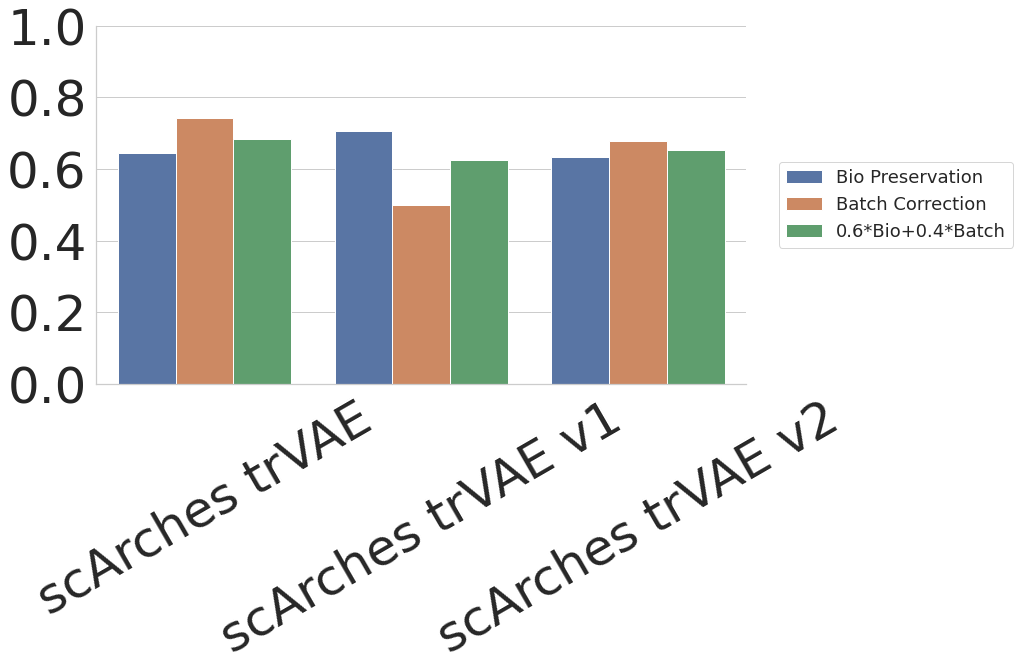

In [16]:
plt.close("all")
plt.figure(figsize=(12, 10))
g = sns.catplot(x="method", y="value", hue="type", kind="bar", 
                data=melted_df, legend=False, 
                height=10, aspect=1.5)
plt.xlabel('', fontsize=22)
plt.ylabel("", fontsize=22)
plt.yticks(np.arange(0, 1.1, 0.2))
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1.05,0.5), borderaxespad=0, loc='center left', prop={'size': 18})
plt.tight_layout()
plt.savefig(f"/home/mohsen/data/scArches/big_mouse_brain_metrics.pdf", dpi=300)
plt.show()

No handles with labels found to put in legend.


<Figure size 864x720 with 0 Axes>

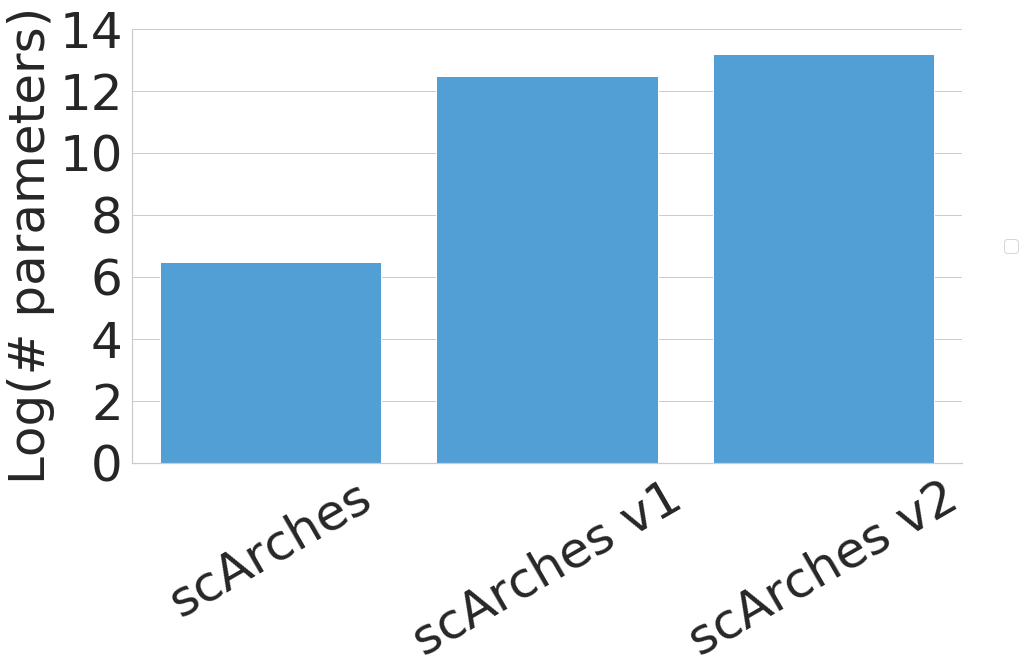

In [7]:
plt.close("all")
plt.figure(figsize=(12, 10))
g = sns.catplot(x="model", y="log_n_params",  kind="bar", 
                data=df, legend=False, color=sns.color_palette('husl', 3)[2],
                height=10, aspect=1.5)
plt.xlabel('', fontsize=22)
plt.ylabel("Log(# parameters)", fontsize=50)
plt.yticks(np.arange(0, 16, 2))
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1.05,0.5), borderaxespad=0, loc='center left', prop={'size': 18})
plt.tight_layout()
plt.savefig(f"./results/big_mouse_brain_parameters.pdf", dpi=300)
plt.show()